# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 batch

Author :- Dhaval Sunil Tharkar

Task 6 :- Prediction using Decision Tree Algorithm

Level :- Intermediate

Language :- Python

Software :- Jupyter Notebook

DataSet link :- https://bit.ly/3kXTdox

Problem Statement :- Create a Decision tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import klib
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset using read_csv()

Read the csv file of iris dataset and store it into the variable name called task6

In [2]:
task6 = pd.read_csv('iris.csv')
task6

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis EDA on the dataset variable task6

In [3]:
task6.head() # Shows the first five rows of the data from variable task6

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
task6.tail() # Shows the last five rows of the data from variable task6

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
task6.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)
# renaming the column name SepalLengthCm as SepalLength , SepalWidthCm as SepalWidth , PetalLengthCm as PetalLength , PetalWidthCm as PetalWidth

In [6]:
task6['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)
# replacing the Iris-virginica by  virginica into the Species Column
# replacing the Iris-setosa by setosa into the Species Column
# replacing the Iris-versicolor by  versicolor into the Species Column

In [7]:
task6=task6.drop("Id", axis=1)
# As the Id column in the iris dataset resembles to the serial number of the rows inserted as it is not necessary for prediction 
# we asre droping the Id column  from the data set

In [8]:
task6.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(150, 5)

In [9]:
task6.info() # Print the summary of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
task6.isna().sum() # Checks whether the dataset contains any null value or not 
# isna().sum() will give the sum of the null values present in the dataset

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [11]:
task6.describe() 
# shows the Statistical details like count, mean,standard deviation, minimum value, quartile 1 i.e. 25 %, quartile 2 i.e. median or 50 %, quartile 3 i.e. 75%, maximum value 

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlation Matrix

In [12]:
correlation = task6.corr()
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

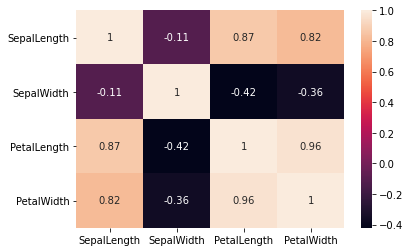

In [13]:
sns.heatmap(correlation,annot=True)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

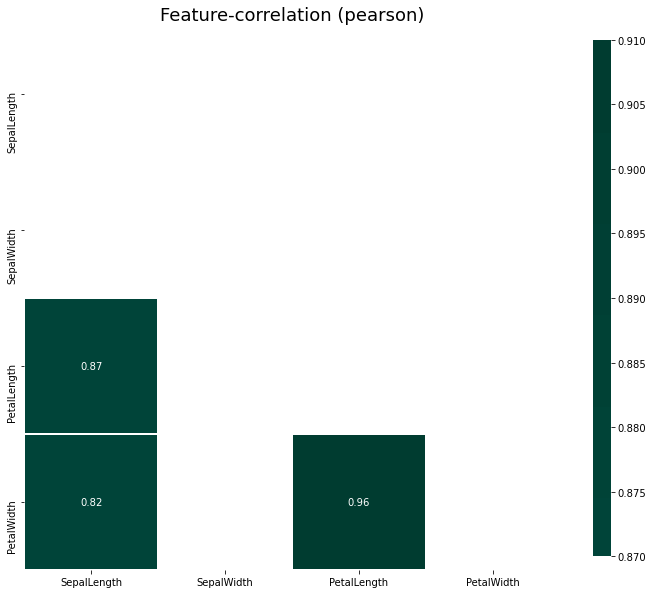

In [14]:
klib.corr_plot(task6, split = 'pos') # displays only the positive correlation

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

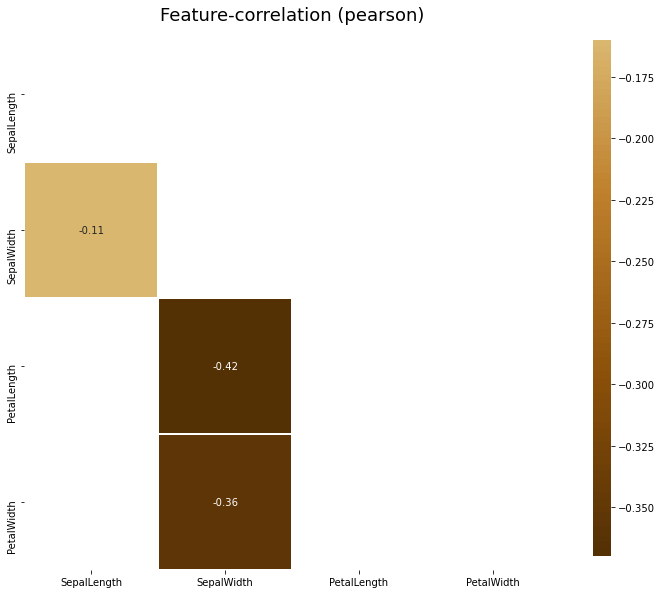

In [15]:
klib.corr_plot(task6, split = 'neg') # displays only the negative correlation

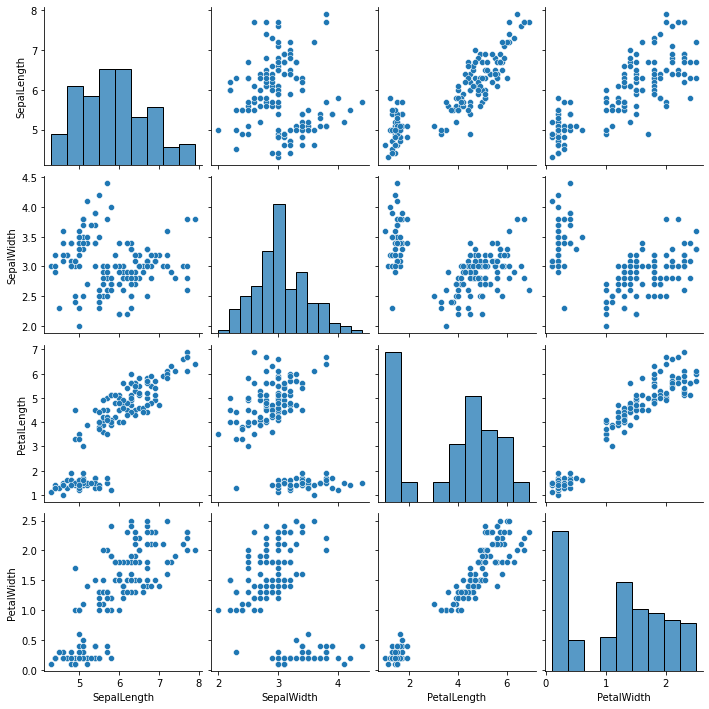

In [16]:
sns.pairplot(task6)

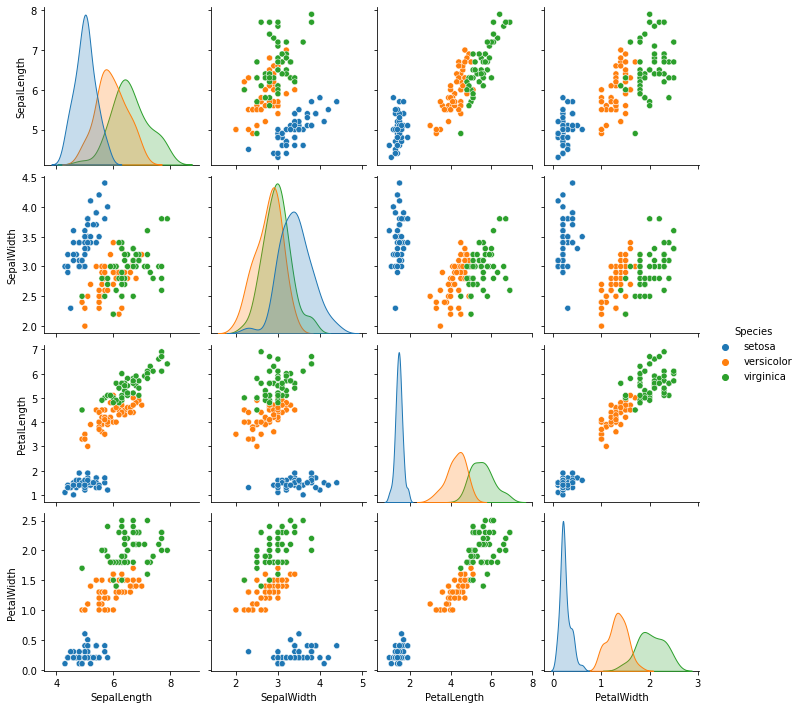

In [17]:
sns.pairplot(task6,hue='Species')
# blue color represents the setosa
# orange color represents the versicolor
# green color represeents the virginica

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

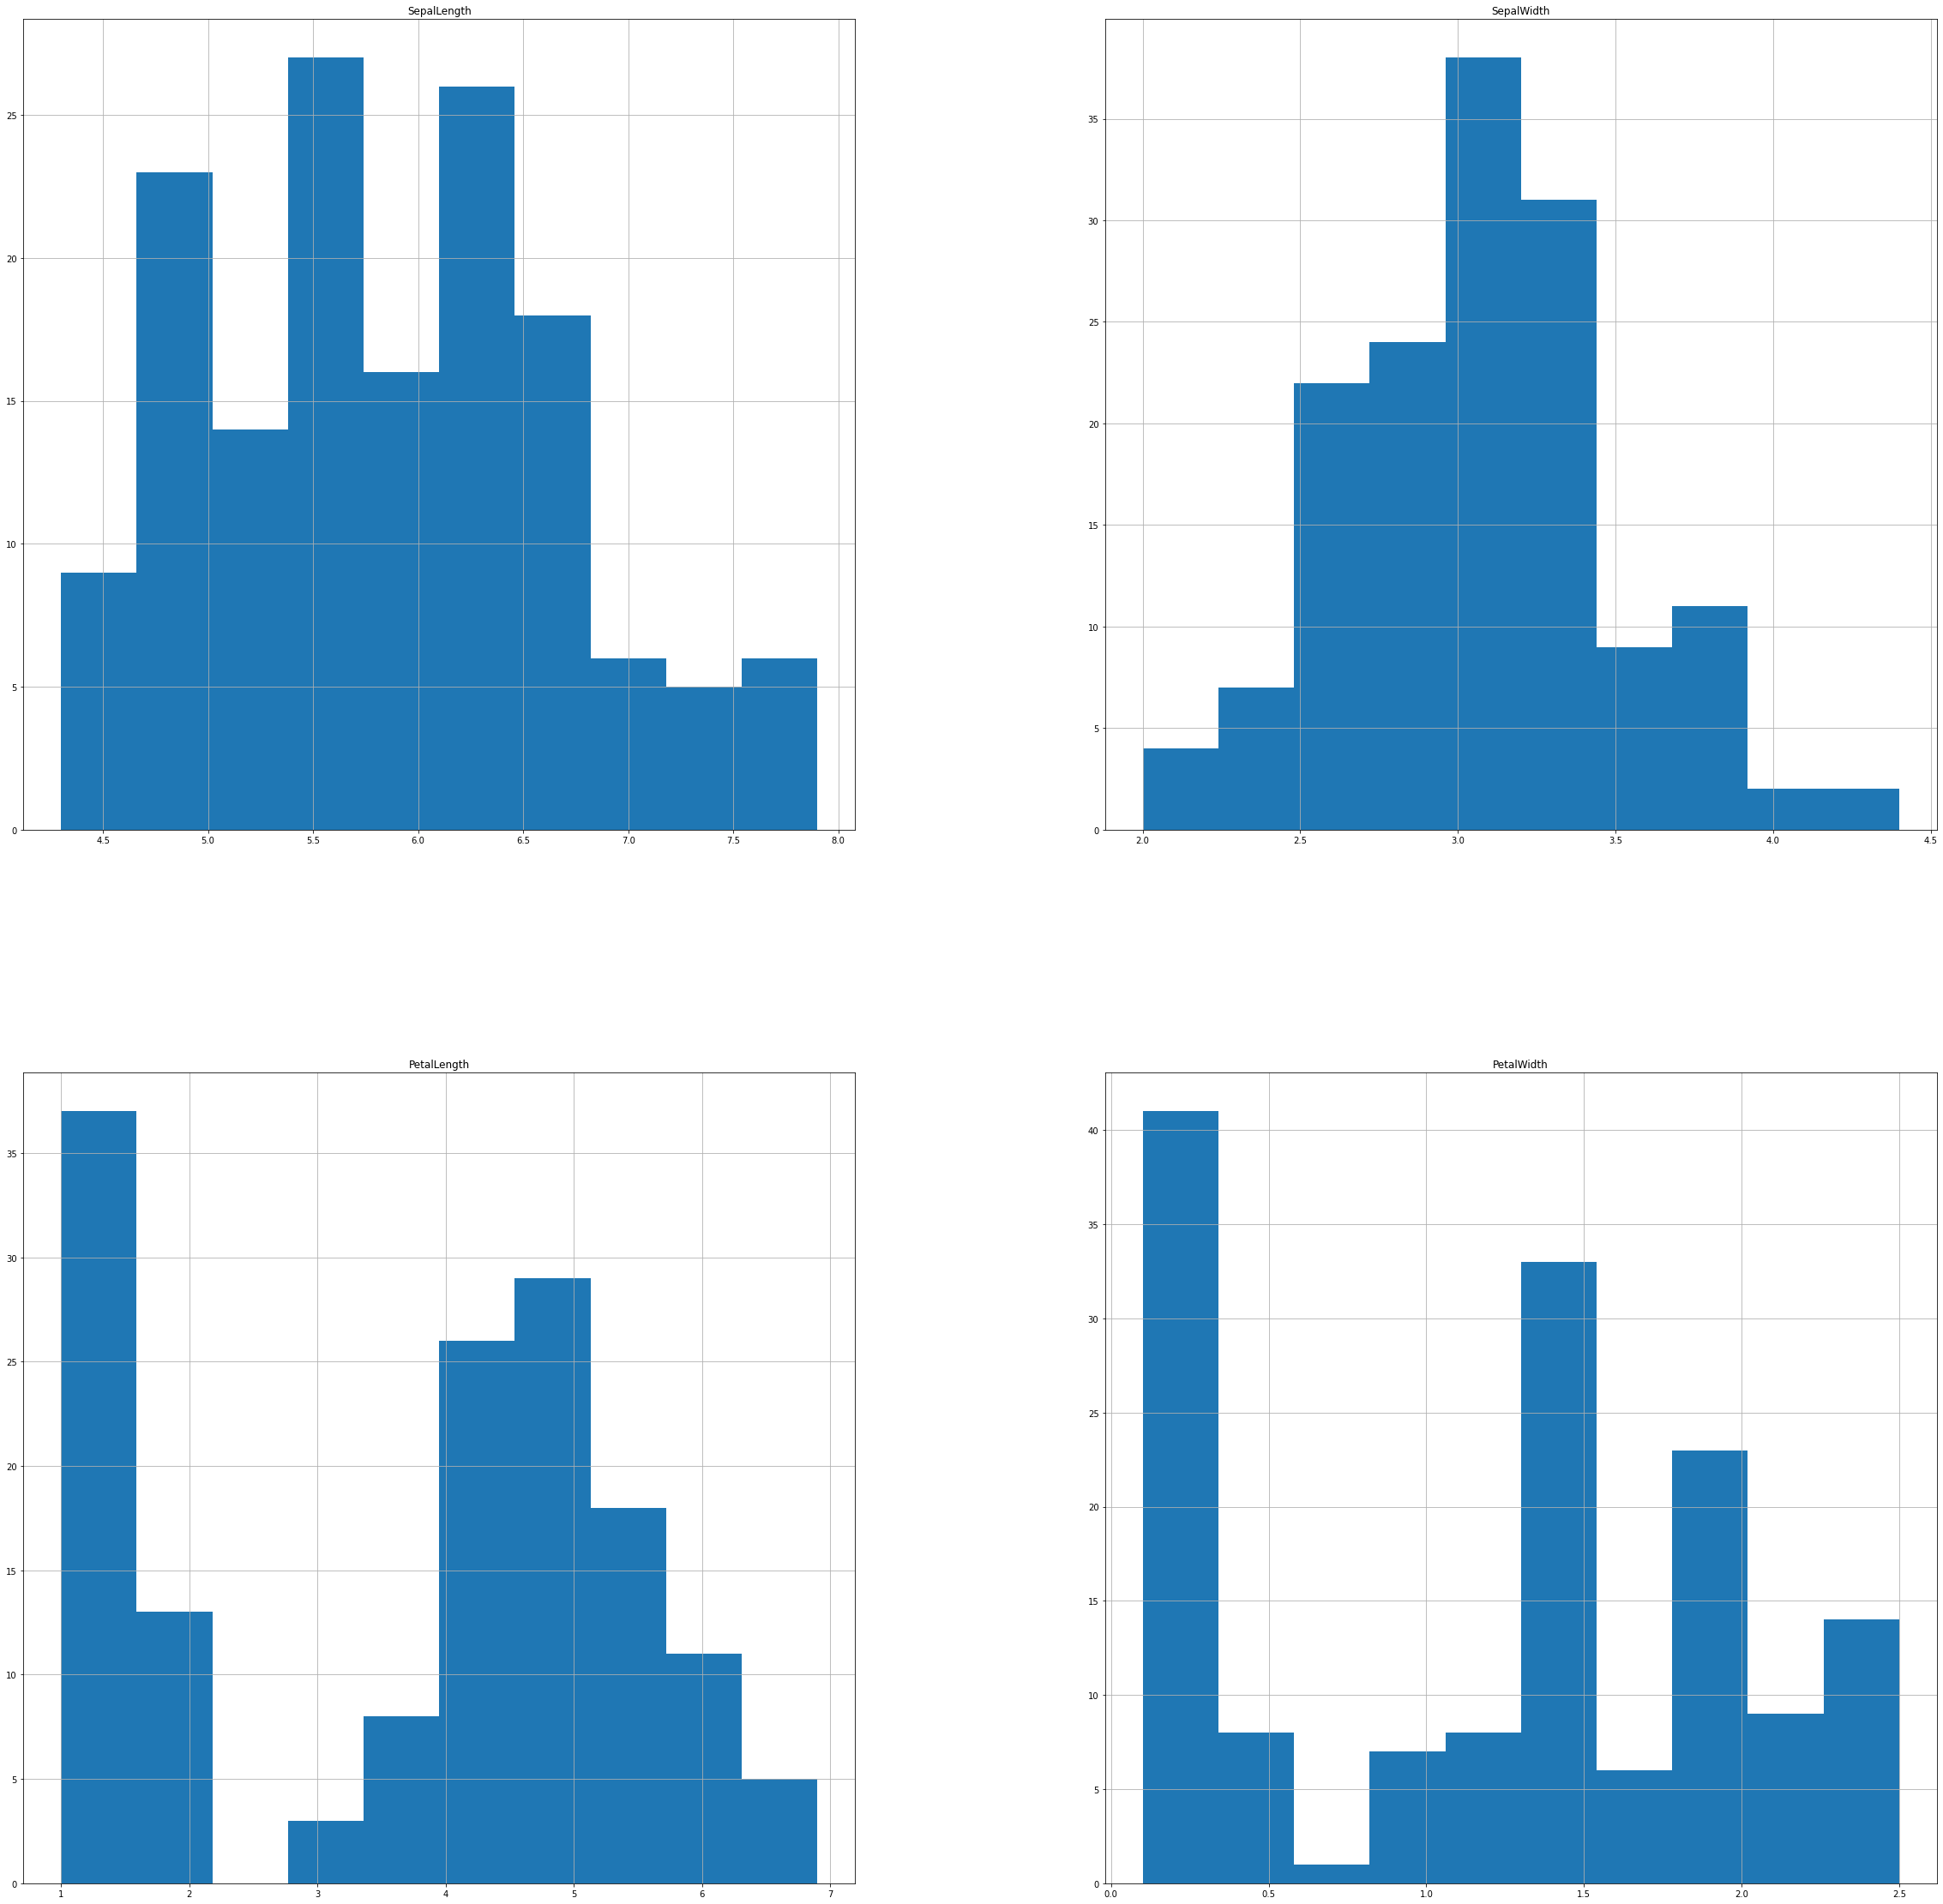

In [18]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
task6.hist(ax = ax)

In [19]:
pd.DataFrame(task6.Species).value_counts()
# Count of Setosa as 50
# Count of Verginica as 50
# Count of Versicolor as 50

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

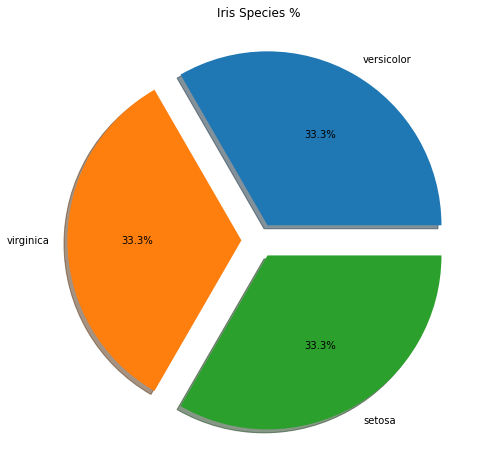

In [20]:
ax=plt.subplots(1,1,figsize=(10,8))
task6['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.ylabel('   ')
plt.show()

## Spliting the dataset as independent variable X and dependent variable y

In [21]:
X=task6.iloc[:,[0,1,2,3]]
y=task6.Species

In [22]:
X.shape

(150, 4)

In [23]:
y.shape

(150,)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Making a Decision tree on iris dataset

In [25]:
from sklearn.tree import DecisionTreeClassifier
task6_clf = DecisionTreeClassifier(criterion='gini')
task6_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred_train = task6_clf.predict(X_train)
y_pred_test = task6_clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

1.0

In [28]:
accuracy_score(y_test, y_pred_test)

0.9666666666666667

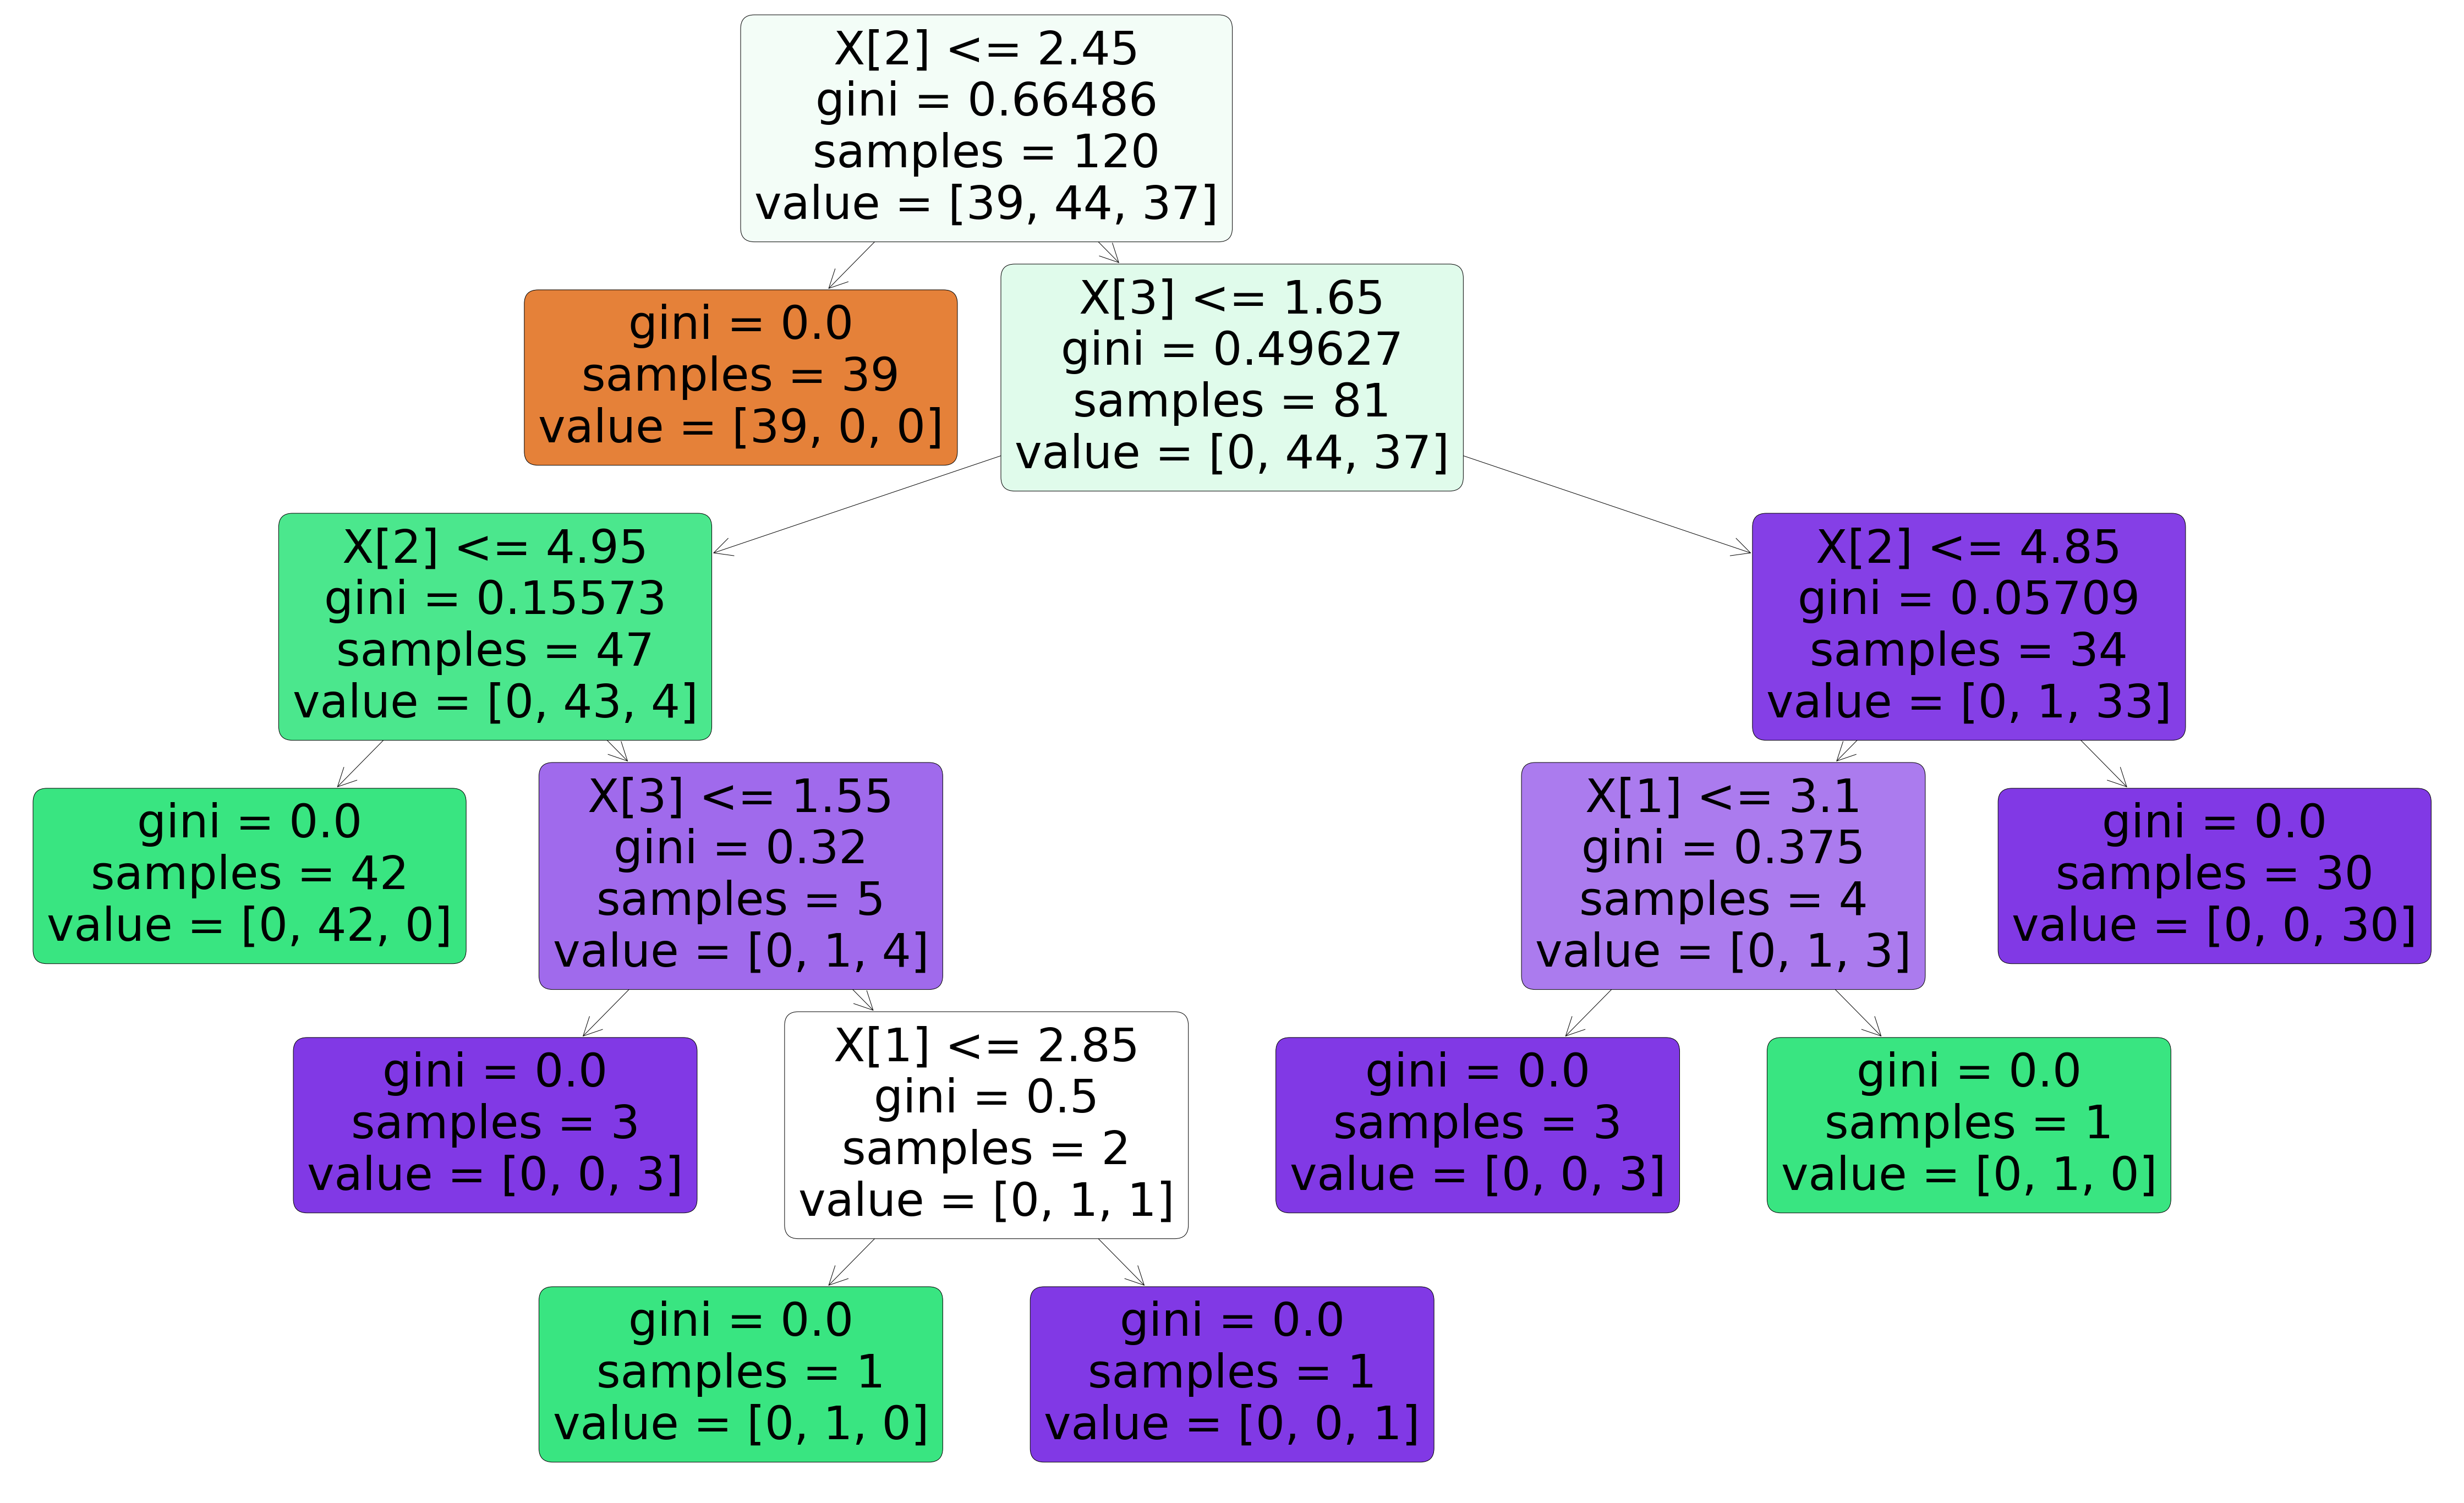

In [29]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 80, 50
plot_tree(task6_clf,precision=5,rounded=True,filled=True);

## conclusion

The above graph used the "criterion='gini" to make a decision tree model

As the accuracy score of th
e graph for train dataset is of about 1.0 % and for the test dataset that is 0.9666666666666667 % 
As the differnence between the train datset and test dataset accuracy is less the 5 % that means the model doesn't overfit and  works perfectly. 